In [35]:
from icecream import ic
import numpy as np
from skimage.restoration import unwrap_phase
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from miscellaneous.loader import load_image
from miscellaneous.propagator import angular_spectrum_band_limited
from miscellaneous.tie import FFTSolver2D

In [36]:
file = '../../generation/image/BMSTU 1024x1024.png'
phase = load_image(file) + 0.2

In [37]:
i_amplitude = 0.5
intensity = i_amplitude * np.ones(phase.shape)

mean = 0.0
standard_deviation = 0.001
noise = np.random.normal(mean, standard_deviation, size=intensity.shape)
intensity += noise
complex_field_back_propagation = np.sqrt(intensity) * np.exp(1j * phase)

noise = np.random.normal(mean, standard_deviation, size=intensity.shape)
intensity += noise
complex_field_forward_propagation = np.sqrt(intensity) * np.exp(1j * phase)

In [38]:
px_size = 0.000005  # 5 mkm
wavelength = 0.000000555  # 555 nm

distances = np.array([0.00001, 0.00005, 0.0001, 0.0002, 0.0005, 0.00095, 0.0015, 0.002, 0.0025])
forward_propagated_fields = []
for distance in distances:
    ic(distance)
    complex_field = np.copy(complex_field_forward_propagation)
    forward_propagated_fields.append(angular_spectrum_band_limited(complex_field, distance, wavelength, px_size))

ic| distance: 1e-05
ic| distance: 5e-05
ic| distance: 0.0001
ic| distance: 0.0002
ic| distance: 0.0005
ic| distance: 0.00095
ic| distance: 0.0015
ic| distance: 0.002
ic| distance: 0.0025


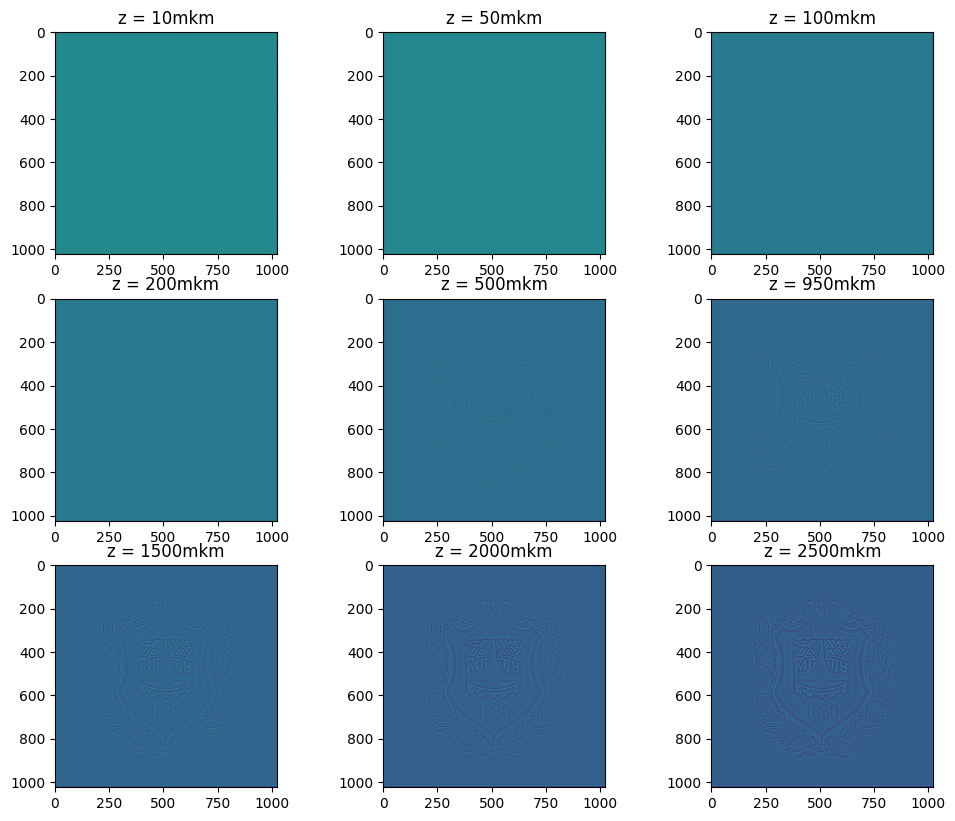

In [39]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(np.abs(forward_propagated_fields[0])**2)
ax_arr[0,0].set_title('z = 10mkm')
ax_arr[0,1].imshow(np.abs(forward_propagated_fields[1])**2)
ax_arr[0,1].set_title('z = 50mkm')
ax_arr[0,2].imshow(np.abs(forward_propagated_fields[2])**2)
ax_arr[0,2].set_title('z = 100mkm')
ax_arr[1,0].imshow(np.abs(forward_propagated_fields[3])**2)
ax_arr[1,0].set_title('z = 200mkm')
ax_arr[1,1].imshow(np.abs(forward_propagated_fields[4])**2)
ax_arr[1,1].set_title('z = 500mkm')
ax_arr[1,2].imshow(np.abs(forward_propagated_fields[5])**2)
ax_arr[1,2].set_title('z = 950mkm')
ax_arr[2,0].imshow(np.abs(forward_propagated_fields[6])**2)
ax_arr[2,0].set_title('z = 1500mkm')
ax_arr[2,1].imshow(np.abs(forward_propagated_fields[7])**2)
ax_arr[2,1].set_title('z = 2000mkm')
ax_arr[2,2].imshow(np.abs(forward_propagated_fields[8])**2)
ax_arr[2,2].set_title('z = 2500mkm')

plt.show()

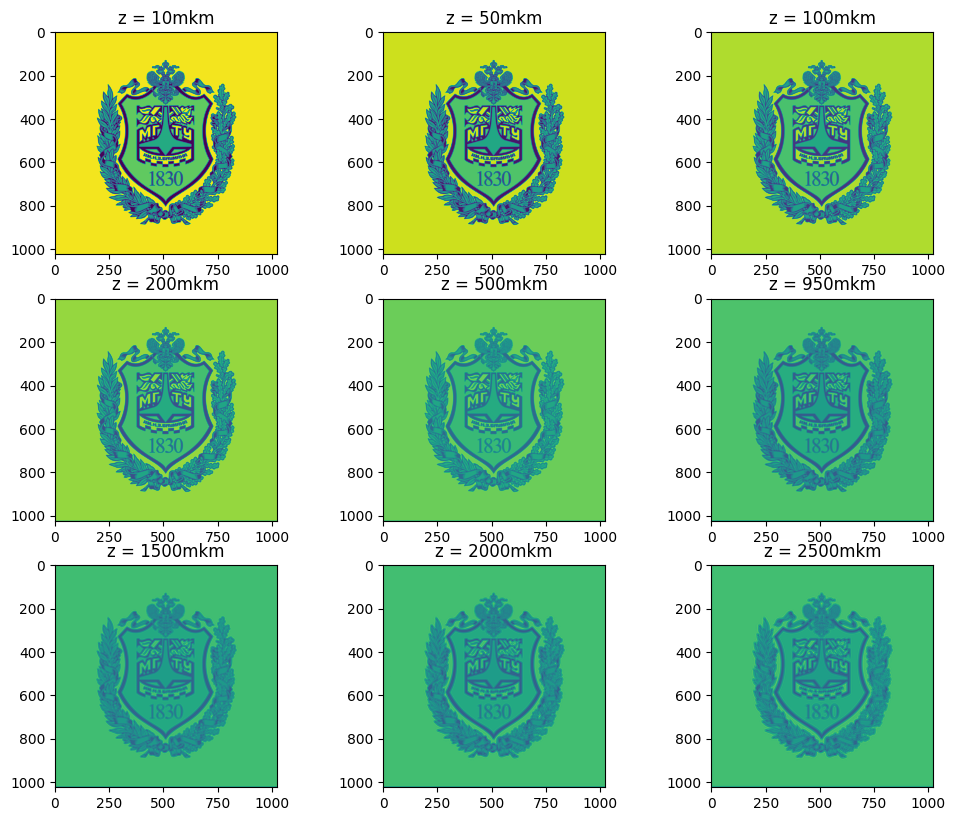

In [40]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(unwrap_phase(np.angle(forward_propagated_fields[0])))
ax_arr[0,0].set_title('z = 10mkm')
ax_arr[0,1].imshow(unwrap_phase(np.angle(forward_propagated_fields[1])))
ax_arr[0,1].set_title('z = 50mkm')
ax_arr[0,2].imshow(unwrap_phase(np.angle(forward_propagated_fields[2])))
ax_arr[0,2].set_title('z = 100mkm')
ax_arr[1,0].imshow(unwrap_phase(np.angle(forward_propagated_fields[3])))
ax_arr[1,0].set_title('z = 200mkm')
ax_arr[1,1].imshow(unwrap_phase(np.angle(forward_propagated_fields[4])))
ax_arr[1,1].set_title('z = 500mkm')
ax_arr[1,2].imshow(unwrap_phase(np.angle(forward_propagated_fields[5])))
ax_arr[1,2].set_title('z = 950mkm')
ax_arr[2,0].imshow(unwrap_phase(np.angle(forward_propagated_fields[6])))
ax_arr[2,0].set_title('z = 1500mkm')
ax_arr[2,1].imshow(unwrap_phase(np.angle(forward_propagated_fields[7])))
ax_arr[2,1].set_title('z = 2000mkm')
ax_arr[2,2].imshow(unwrap_phase(np.angle(forward_propagated_fields[8])))
ax_arr[2,2].set_title('z = 2500mkm')

plt.show()

In [41]:
distances = np.array([-0.00001, -0.00005, -0.0001, -0.0002, -0.0005, -0.00095, -0.0015, -0.002, -0.0025])
back_propagated_fields = []
for distance in distances:
    ic(distance)
    complex_field = np.copy(complex_field_back_propagation)
    back_propagated_fields.append(angular_spectrum_band_limited(complex_field, distance, wavelength, px_size))

ic| distance: -1e-05
ic| distance: -5e-05
ic| distance: -0.0001
ic| distance: -0.0002
ic| distance: -0.0005
ic| distance: -0.00095
ic| distance: -0.0015
ic| distance: -0.002
ic| distance: -0.0025


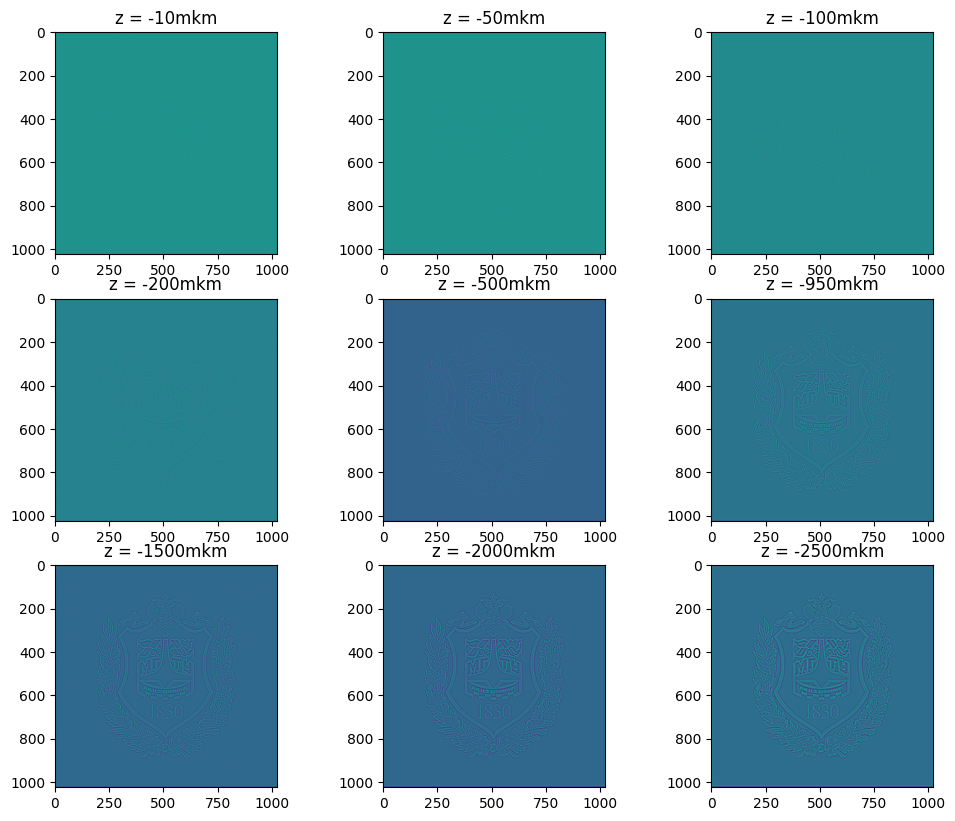

In [42]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(np.abs(back_propagated_fields[0])**2)
ax_arr[0,0].set_title('z = -10mkm')
ax_arr[0,1].imshow(np.abs(back_propagated_fields[1])**2)
ax_arr[0,1].set_title('z = -50mkm')
ax_arr[0,2].imshow(np.abs(back_propagated_fields[2])**2)
ax_arr[0,2].set_title('z = -100mkm')
ax_arr[1,0].imshow(np.abs(back_propagated_fields[3])**2)
ax_arr[1,0].set_title('z = -200mkm')
ax_arr[1,1].imshow(np.abs(back_propagated_fields[4])**2)
ax_arr[1,1].set_title('z = -500mkm')
ax_arr[1,2].imshow(np.abs(back_propagated_fields[5])**2)
ax_arr[1,2].set_title('z = -950mkm')
ax_arr[2,0].imshow(np.abs(back_propagated_fields[6])**2)
ax_arr[2,0].set_title('z = -1500mkm')
ax_arr[2,1].imshow(np.abs(back_propagated_fields[7])**2)
ax_arr[2,1].set_title('z = -2000mkm')
ax_arr[2,2].imshow(np.abs(back_propagated_fields[8])**2)
ax_arr[2,2].set_title('z = -2500mkm')

plt.show()

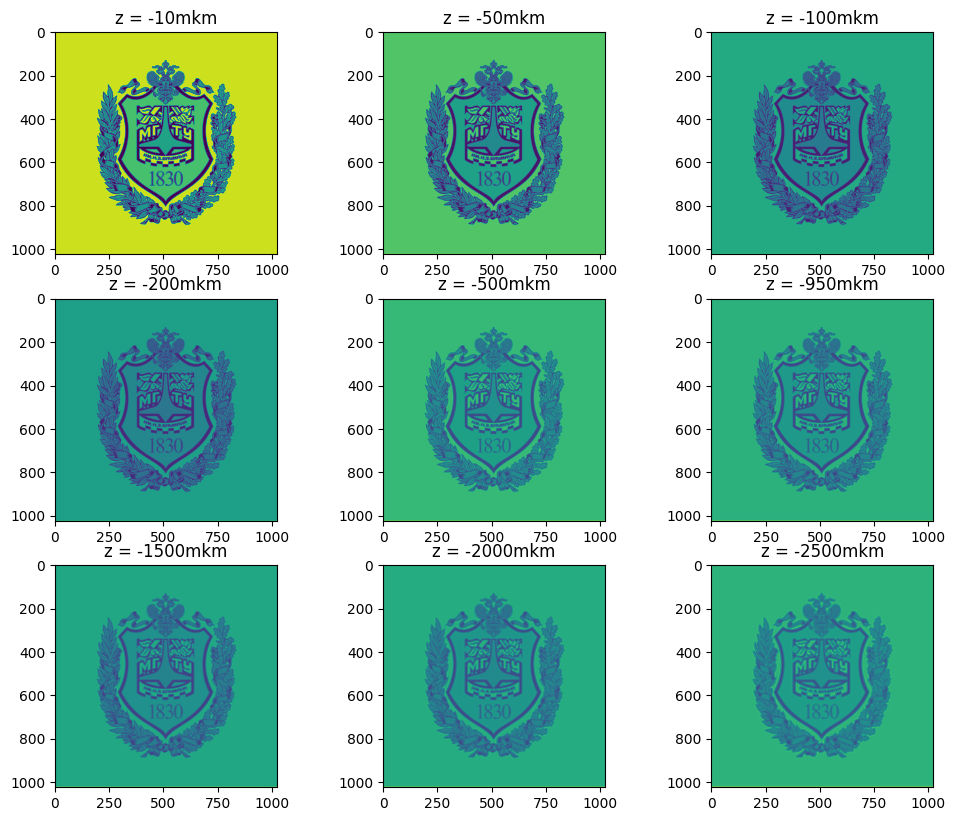

In [43]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(unwrap_phase(np.angle(back_propagated_fields[0])))
ax_arr[0,0].set_title('z = -10mkm')
ax_arr[0,1].imshow(unwrap_phase(np.angle(back_propagated_fields[1])))
ax_arr[0,1].set_title('z = -50mkm')
ax_arr[0,2].imshow(unwrap_phase(np.angle(back_propagated_fields[2])))
ax_arr[0,2].set_title('z = -100mkm')
ax_arr[1,0].imshow(unwrap_phase(np.angle(back_propagated_fields[3])))
ax_arr[1,0].set_title('z = -200mkm')
ax_arr[1,1].imshow(unwrap_phase(np.angle(back_propagated_fields[4])))
ax_arr[1,1].set_title('z = -500mkm')
ax_arr[1,2].imshow(unwrap_phase(np.angle(back_propagated_fields[5])))
ax_arr[1,2].set_title('z = -950mkm')
ax_arr[2,0].imshow(unwrap_phase(np.angle(back_propagated_fields[6])))
ax_arr[2,0].set_title('z = -1500mkm')
ax_arr[2,1].imshow(unwrap_phase(np.angle(back_propagated_fields[7])))
ax_arr[2,1].set_title('z = -2000mkm')
ax_arr[2,2].imshow(unwrap_phase(np.angle(back_propagated_fields[8])))
ax_arr[2,2].set_title('z = -2500mkm')

plt.show()

In [44]:
distances = np.array([0.00001, 0.00005, 0.0001, 0.0002, 0.0005, 0.00095, 0.0015, 0.002, 0.0025])
retrieved_phases = {}
for dz, i in zip(distances, range(len(distances))):
    ic(dz)
    intensities = [np.abs(field) ** 2 for field in [forward_propagated_fields[i], back_propagated_fields[i]]]

    dz = 2 * dz
    dz = - dz
    threshold = 0.1

    solver = FFTSolver2D(intensities, dz, wavelength, px_size)
    retrieved_phases[-dz] = solver.solve(threshold)

retrieved_phases.keys()

ic| dz: 1e-05
ic| dz: 5e-05
ic| dz: 0.0001
ic| dz: 0.0002
ic| dz: 0.0005
ic| dz: 0.00095
ic| dz: 0.0015
ic| dz: 0.002
ic| dz: 0.0025


dict_keys([2e-05, 0.0001, 0.0002, 0.0004, 0.001, 0.0019, 0.003, 0.004, 0.005])

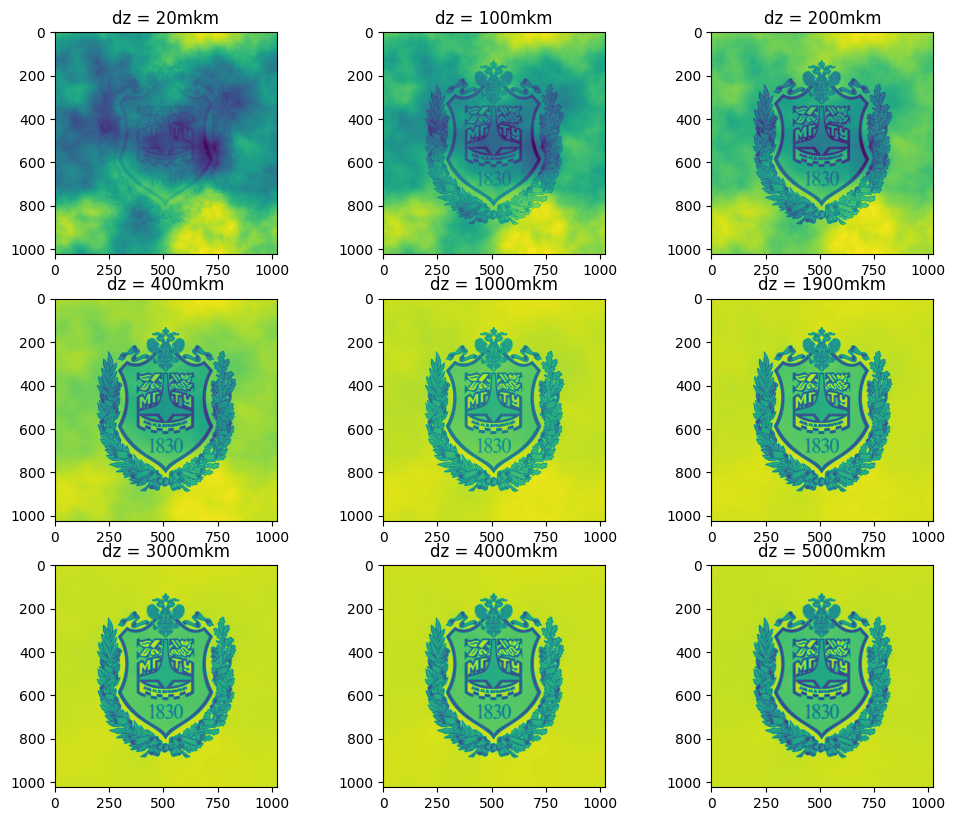

In [45]:
fig, ax_arr = plt.subplots(3, 3, figsize=(12,10), dpi=100)

ax_arr[0,0].imshow(retrieved_phases[0.00002])
ax_arr[0,0].set_title('dz = 20mkm')
ax_arr[0,1].imshow(retrieved_phases[0.0001])
ax_arr[0,1].set_title('dz = 100mkm')
ax_arr[0,2].imshow(retrieved_phases[0.0002])
ax_arr[0,2].set_title('dz = 200mkm')
ax_arr[1,0].imshow(retrieved_phases[0.0004])
ax_arr[1,0].set_title('dz = 400mkm')
ax_arr[1,1].imshow(retrieved_phases[0.001])
ax_arr[1,1].set_title('dz = 1000mkm')
ax_arr[1,2].imshow(retrieved_phases[0.0019])
ax_arr[1,2].set_title('dz = 1900mkm')
ax_arr[2,0].imshow(retrieved_phases[0.003])
ax_arr[2,0].set_title('dz = 3000mkm')
ax_arr[2,1].imshow(retrieved_phases[0.004])
ax_arr[2,1].set_title('dz = 4000mkm')
ax_arr[2,2].imshow(retrieved_phases[0.005])
ax_arr[2,2].set_title('dz = 5000mkm')

plt.show()

In [50]:
def find_power(data: np.ndarray, threshold:int=0.01) -> int:
    threshold /= 1000
    power = 0
    counter = 0
    for i in data:
        for j in i:
            if (j - counter) ** 2 > threshold: power += j ** 2
            counter = j
        counter = 0
    return power

powers = {}

for dz, phase in retrieved_phases.items():
    powers[dz] = find_power(phase)
    ic(dz, powers[dz])

ic| dz: 2e-05, powers[dz]: 2020883.4992973616
ic| dz: 0.0001, powers[dz]: 99084.91660016606
ic| dz: 0.0002, powers[dz]: 55460.15962624944
ic| dz: 0.0004, powers[dz]: 45512.26862841561
ic| dz: 0.001, powers[dz]: 44428.80133004983
ic| dz: 0.0019, powers[dz]: 45184.54423749435
ic| dz: 0.003, powers[dz]: 43168.89588490085
ic| dz: 0.004, powers[dz]: 41996.95977918515
ic| dz: 0.005, powers[dz]: 40357.54840535086


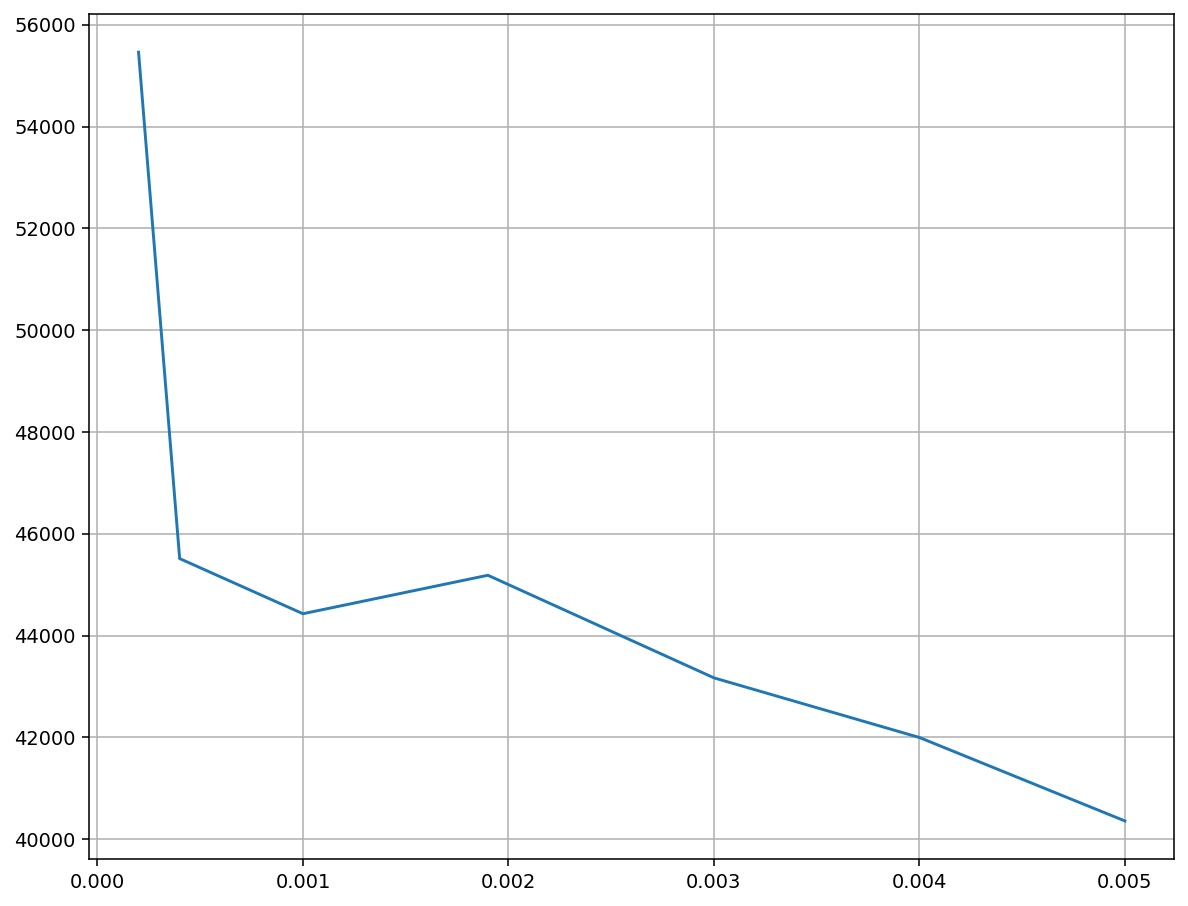

In [51]:
powers.pop(0.00002)
powers.pop(0.0001)

figure(figsize=(10, 8), dpi=140)
plt.plot(powers.keys(), powers.values())
plt.grid()
plt.show()